<a href="https://colab.research.google.com/github/cwpdntm/LangChain/blob/main/AIFactory/launch_menu_recommender/burgerking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 버거킹 메뉴 추천 ChatGPT 

In [ ]:
!pip install langchain
!pip install pypdf
!pip install openai
!pip install gdown
!pip install chromadb
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.3/249.3 kB 4.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 

### 사용할 패키지 불러오기

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
import re
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma
from glob import glob
from langchain.docstore.document import Document
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from pypdf import PdfReader
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.chains import RetrievalQAWithSourcesChain
import gdown
import os
from PIL import Image
import requests
from typing import List, Tuple, Any, Union
from langchain.schema import AgentAction, AgentFinish
from langchain.agents import Tool, AgentExecutor, BaseMultiActionAgent
from langchain.agents.agent import BaseSingleActionAgent

os.environ['OPENAI_API_KEY'] = "api-key"

&nbsp;

### PDF 불러오기 및 전처리

In [ ]:
id = "11U7let6PY_YCJpgRT0Dpr5DXSO3Ceqep"
file_name = "버거킹.pdf"
gdown.download(id=id, output=file_name, quiet=False)

loader = PyPDFLoader(file_name)
documents = loader.load()

Downloading...
From: https://drive.google.com/uc?id=11U7let6PY_YCJpgRT0Dpr5DXSO3Ceqep
To: /content/버거킹.pdf
100%|██████████| 346k/346k [00:00<00:00, 38.3MB/s]


In [ ]:
documents

[Document(page_content='서초동 로그인\n인기메뉴\n스페셜오퍼버거킹-강남대로점\n사장님알림  딜리버리 서비스 메뉴의 가격은 매장 가격과 상이할 수 있습니다.★★★★★ 4.7\n최소주문금액 12,000원\n결제 요기서결제\n메뉴 105 클린리뷰 1404 정보\n콰트로 맥시멈…\n20,000원콰트로 맥시멈…\n18,000원스모키 바비큐 …\n13,500원스모키 바비큐 …\n12,000원치킨킹BLT 세\n10,900원\n통새우와퍼세트\n입안에서 톡톡 터지는 통새우가 매콤한 스파이시 토마토소스와 100% 순쇠고기 패티를 만나 완성한\n통새우와퍼!\n11,300원\n콰트로치즈와퍼 세트\n네가지 고품격 치즈와 100% 순쇠고기 패티로 탄생한 버거킹의 스테디 셀러, 콰트로치즈와퍼!\n11,300원\n갈릭불고기와퍼 세트\n크리스피 갈릭칩과 달콤한 불고기소스로 즐기는 갈릭불고기와퍼!\n10,800원\n와퍼 세트\n불에 직접 구운 순 쇠고기 패티에 싱싱한 야채가 한가득 버거킹의 대표 메뉴, 와퍼!\n10,500원\n몬스터와퍼세트\n디아블로 소스의 매콤함, 불에 직접 구운 100% 순쇠고기 패티와 치킨패티까지 압도적 크기의 몬스\n터와퍼!\n12,200원\n기간한정\n바삭킹 & 너겟킹10,스위트칠리소스\n바삭킹8조각＋너겟킹10조각＋스위트칠리소스\n16,000원\n바삭킹 & 너겟킹10,디아블로소스\n바삭킹8조각＋너겟킹10조각＋디아블로소스\n16,000원\n바삭킹 & 모짜볼10,스위트칠리소스\n바삭킹8조각＋크리미모짜볼10조각＋스위트칠리소스\n15,900원\n주문표 바로 주문하기', metadata={'source': '버거킹.pdf', 'page': 0}),
 Document(page_content='와퍼 세트\nX 세트바삭킹 & 모짜볼10,디아블로소스\n바삭킹8조각＋크리미모짜볼10조각＋디아블로소스\n15,900원\n콰트로 맥시멈…이하생략 3 세트\n100% 순쇠고기 패티 3장에 네 가지 치즈까지 더한 압도적인 녀석이 나타났다.\n18,000원\n콰트로 맥시멈…이하

In [ ]:
output = []
# text 정제
for page in documents:
    text = page.page_content
    text = re.sub(r"(\w+)-\n(\w+)", r"\1\2", text)   # 안녕-\n하세요 -> 안녕하세요  
    text = re.sub(r"(?<!\n\s)\n(?!\s\n)", " ", text.strip()) # "인\n공\n\n지능펙\n토리 -> 인공지능펙토리
    text = re.sub(r"\n\s*\n", "\n\n", text) # \n버\n\n거\n\n킹\n -> 버\n거\n킹
    output.append(text)

In [ ]:
output

['서초동 로그인 인기메뉴 스페셜오퍼버거킹-강남대로점 사장님알림  딜리버리 서비스 메뉴의 가격은 매장 가격과 상이할 수 있습니다.★★★★★ 4.7 최소주문금액 12,000원 결제 요기서결제 메뉴 105 클린리뷰 1404 정보 콰트로 맥시멈… 20,000원콰트로 맥시멈… 18,000원스모키 바비큐 … 13,500원스모키 바비큐 … 12,000원치킨킹BLT 세 10,900원 통새우와퍼세트 입안에서 톡톡 터지는 통새우가 매콤한 스파이시 토마토소스와 100% 순쇠고기 패티를 만나 완성한 통새우와퍼! 11,300원 콰트로치즈와퍼 세트 네가지 고품격 치즈와 100% 순쇠고기 패티로 탄생한 버거킹의 스테디 셀러, 콰트로치즈와퍼! 11,300원 갈릭불고기와퍼 세트 크리스피 갈릭칩과 달콤한 불고기소스로 즐기는 갈릭불고기와퍼! 10,800원 와퍼 세트 불에 직접 구운 순 쇠고기 패티에 싱싱한 야채가 한가득 버거킹의 대표 메뉴, 와퍼! 10,500원 몬스터와퍼세트 디아블로 소스의 매콤함, 불에 직접 구운 100% 순쇠고기 패티와 치킨패티까지 압도적 크기의 몬스 터와퍼! 12,200원 기간한정 바삭킹 & 너겟킹10,스위트칠리소스 바삭킹8조각＋너겟킹10조각＋스위트칠리소스 16,000원 바삭킹 & 너겟킹10,디아블로소스 바삭킹8조각＋너겟킹10조각＋디아블로소스 16,000원 바삭킹 & 모짜볼10,스위트칠리소스 바삭킹8조각＋크리미모짜볼10조각＋스위트칠리소스 15,900원 주문표 바로 주문하기',
 '와퍼 세트 X 세트바삭킹 & 모짜볼10,디아블로소스 바삭킹8조각＋크리미모짜볼10조각＋디아블로소스 15,900원 콰트로 맥시멈…이하생략 3 세트 100% 순쇠고기 패티 3장에 네 가지 치즈까지 더한 압도적인 녀석이 나타났다. 18,000원 콰트로 맥시멈…이하생략 4 세트 100% 순쇠고기 패티 4장에 네 가지 치즈까지 더한 압도적인 녀석이 나타났다. 20,000원 스모키 바비큐 몬스터 세트 진한 훈연향과 불맛의 끝판왕 스모키바비큐, 바삭하게 튀긴 치킨패티까지 더해진 강력한 조합 13,500원 스

In [ ]:
doc_chunks = []

for line in output:
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=2000, # 최대 청크 길이
        separators=["\n\n", "\n", ".", "!", "?", ",", " ", ""], #  텍스트를 청크로 분할하는 데 사용되는 문자 목록
        chunk_overlap=0, # 인접한 청크 간에 중복되는 문자 수
    )
    chunks = text_splitter.split_text(line)
    for i, chunk in enumerate(chunks):
        doc = Document(
            page_content=chunk, metadata={"page": i, "source": file_name}
        )
        doc_chunks.append(doc)

In [ ]:
doc_chunks

[Document(page_content='서초동 로그인 인기메뉴 스페셜오퍼버거킹-강남대로점 사장님알림  딜리버리 서비스 메뉴의 가격은 매장 가격과 상이할 수 있습니다.★★★★★ 4.7 최소주문금액 12,000원 결제 요기서결제 메뉴 105 클린리뷰 1404 정보 콰트로 맥시멈… 20,000원콰트로 맥시멈… 18,000원스모키 바비큐 … 13,500원스모키 바비큐 … 12,000원치킨킹BLT 세 10,900원 통새우와퍼세트 입안에서 톡톡 터지는 통새우가 매콤한 스파이시 토마토소스와 100% 순쇠고기 패티를 만나 완성한 통새우와퍼! 11,300원 콰트로치즈와퍼 세트 네가지 고품격 치즈와 100% 순쇠고기 패티로 탄생한 버거킹의 스테디 셀러, 콰트로치즈와퍼! 11,300원 갈릭불고기와퍼 세트 크리스피 갈릭칩과 달콤한 불고기소스로 즐기는 갈릭불고기와퍼! 10,800원 와퍼 세트 불에 직접 구운 순 쇠고기 패티에 싱싱한 야채가 한가득 버거킹의 대표 메뉴, 와퍼! 10,500원 몬스터와퍼세트 디아블로 소스의 매콤함, 불에 직접 구운 100% 순쇠고기 패티와 치킨패티까지 압도적 크기의 몬스 터와퍼! 12,200원 기간한정 바삭킹 & 너겟킹10,스위트칠리소스 바삭킹8조각＋너겟킹10조각＋스위트칠리소스 16,000원 바삭킹 & 너겟킹10,디아블로소스 바삭킹8조각＋너겟킹10조각＋디아블로소스 16,000원 바삭킹 & 모짜볼10,스위트칠리소스 바삭킹8조각＋크리미모짜볼10조각＋스위트칠리소스 15,900원 주문표 바로 주문하기', metadata={'page': 0, 'source': '버거킹.pdf'}),
 Document(page_content='와퍼 세트 X 세트바삭킹 & 모짜볼10,디아블로소스 바삭킹8조각＋크리미모짜볼10조각＋디아블로소스 15,900원 콰트로 맥시멈…이하생략 3 세트 100% 순쇠고기 패티 3장에 네 가지 치즈까지 더한 압도적인 녀석이 나타났다. 18,000원 콰트로 맥시멈…이하생략 4 세트 100% 순쇠고기 패티 4장에 네 가지 치즈까지 더한 압도적인 녀석이 

In [ ]:
embeddings = OpenAIEmbeddings()
index = Chroma.from_documents(doc_chunks, embeddings)

&nbsp;

### Prompt 및 chain 설정

In [ ]:
system_template="""To answer the question at the end, use the following context. If you don't know the answer, just say you don't know and don't try to make up an answer.
I want you to act as my Burger King menu recommender. It tells you your budget and suggests what to buy. You should only reply to items you recommend. Don't write a description.

Below is an example.
“My budget is 10,000 won, and it is the best menu combination within the budget."

you only answer in Korean

{summaries}
"""
messages = [
    SystemMessagePromptTemplate.from_template(system_template),
    HumanMessagePromptTemplate.from_template("{question}")
]
prompt = ChatPromptTemplate.from_messages(messages)


chain_type_kwargs = {"prompt": prompt}
bk_chain = RetrievalQAWithSourcesChain.from_chain_type(
    ChatOpenAI(temperature=0), 
    chain_type="stuff", 
    retriever=index.as_retriever(),
    chain_type_kwargs=chain_type_kwargs,
    #reduce_k_below_max_tokens=True
)

&nbsp;

### 답변 테스트

In [ ]:
result = bk_chain({"question": '총 예산 30,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.'})

print(f"질문 : {result['question']}")
print()
print(f"답변 : {result['answer']}")

질문 : 총 예산 30,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.

답변 : 30,000원 이내로 추천해드리겠습니다.

1. 와퍼 세트 (10,500원) + 너겟킹 8조각 (5,300원) + 쉐이킹프라이 (3,300원) = 19,100원
- 와퍼 세트: 불에 직접 구운 순 쇠고기 패티에 싱싱한 야채가 한가득 버거킹의 대표 메뉴, 와퍼!
- 너겟킹 8조각: 바삭하고 촉촉한 부드러운 너겟킹!
- 쉐이킹프라이: 구운갈릭 깊은 풍미가 느껴지는 시즈닝으로 취향 저격! 구운 마늘의 깊은 풍미!

2. 콰트로치즈와퍼 세트 (11,300원) + 어니언링 (3,300원) + 너겟킹 4조각 (3,100원) = 17,700원
- 콰트로치즈와퍼 세트: 네가지 고품격 치즈와 100% 순쇠고기 패티로 탄생한 버거킹의 스테디 셀러, 콰트로치즈와퍼!
- 어니언링: 크기도 UP! 맛도 UP! 고소한 진한 풍미가 일품인 어니언링!
- 너겟킹 4조각: 바삭하고 촉촉한 부드러운 너겟킹!

3. 통새우와퍼 세트 (11,300원) + 21치즈스틱 (3,400원) + 스윗어니언 시즈닝 (300원) = 15,000원
- 통새우와퍼 세트: 입안에서 톡톡 터지는 통새우가 매콤한 스파이시 토마토소스와 100% 순쇠고기 패티를 만나 완성한 통새우와퍼!
- 21치즈스틱: 21cm의 역대급 사이즈! 진하고 고소한 자연 모짜렐라가 가득한 21치즈스틱!
- 스윗어니언 시즈닝: 고소한 치즈맛에 매콤함까지!!

위 세 가지 조합 중에서 선택하시면 예산 내에서 맛있게 즐길 수 있습니다.


In [ ]:
result = bk_chain({"question": '총 예산 20,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.'})

print(f"질문 : {result['question']}")
print()
print(f"답변 : {result['answer']}")

질문 : 총 예산 20,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.

답변 : 콰트로 맥시멈 세트와 너겟킹 8조각을 조합하면 총 가격은 19,700원입니다. 콰트로 맥시멈 세트는 네 가지 고품격 치즈와 100% 순쇠고기 패티로 탄생한 버거킹의 스테디 셀러이며, 너겟킹 8조각은 바삭하고 촉촉한 부드러운 너겟킹입니다. 총 예산을 넘지 않으면서도 콰트로 맥시멈의 고급스러운 맛과 너겟킹의 바삭한 식감을 즐길 수 있습니다.


In [ ]:
result = bk_chain({"question": '총 예산 10,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.'})

print(f"질문 : {result['question']}")
print()
print(f"답변 : {result['answer']}")

질문 : 총 예산 10,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.

답변 : 제가 추천하는 메뉴 조합은 "와퍼주니어"와 "너겟킹4조각"입니다. 이 조합의 가격은 9,500원입니다. 와퍼주니어는 불에 직접 구운 순 쇠고기 패티에 싱싱한 야채가 한가득 들어간 대표 메뉴이며, 너겟킹은 바삭하고 촉촉한 부드러운 너겟킹입니다. 두 메뉴를 함께 즐기면서 다양한 맛을 느낄 수 있습니다.


In [ ]:
result = bk_chain({"question": '사이드메뉴 추천해줘'})

print(f"질문 : {result['question']}")
print()
print(f"답변 : {result['answer']}")

질문 : 사이드메뉴 추천해줘

답변 : 사이드 메뉴로는 어니언링, 너겟킹, 21치즈스틱, 쉐이킹프라이 등이 추천됩니다. 어니언링은 고소한 진한 풍미가 일품이며, 너겟킹은 바삭하고 촉촉한 부드러운 맛이 좋습니다. 21치즈스틱은 크기도 크고 고소한 자연 모짜렐라가 가득한 맛있는 메뉴입니다. 쉐이킹프라이는 구운 마늘의 깊은 풍미가 느껴지는 시즈닝으로 취향을 저격할 수 있는 메뉴입니다.


&nbsp;

### chat-gpt 사용시 주의 사항
- https://python.langchain.com/en/latest/modules/chains/index_examples/vector_db_qa_with_sources.html

In [ ]:
help(RetrievalQAWithSourcesChain)

Help on class RetrievalQAWithSourcesChain in module langchain.chains.qa_with_sources.retrieval:

class RetrievalQAWithSourcesChain(langchain.chains.qa_with_sources.base.BaseQAWithSourcesChain)
 |  RetrievalQAWithSourcesChain(*, memory: Optional[langchain.schema.BaseMemory] = None, callbacks: Union[List[langchain.callbacks.base.BaseCallbackHandler], langchain.callbacks.base.BaseCallbackManager, NoneType] = None, callback_manager: Optional[langchain.callbacks.base.BaseCallbackManager] = None, verbose: bool = None, combine_documents_chain: langchain.chains.combine_documents.base.BaseCombineDocumentsChain, question_key: str = 'question', input_docs_key: str = 'docs', answer_key: str = 'answer', sources_answer_key: str = 'sources', return_source_documents: bool = False, retriever: langchain.schema.BaseRetriever, reduce_k_below_max_tokens: bool = False, max_tokens_limit: int = 3375) -> None
 |  
 |  Question-answering with sources over an index.
 |  
 |  Method resolution order:
 |      Retr

In [ ]:
result = bk_chain({"question": '와퍼주니어 설명해줘'})


print(f"질문 : {result['question']}")
print('----------------------------')
print(f"답변 : {result['answer']}")

질문 : 와퍼주니어 설명해줘
----------------------------
답변 : 와퍼주니어는 버거킹의 대표적인 메뉴 중 하나로, 불에 직접 구운 100% 순 쇠고기 패티에 싱싱한 야


In [ ]:
result = bk_chain({"question": '와퍼주니어 설명해줘'})


print(f"질문 : {result['question']}")
print('----------------------------')
print(f"답변 : {result['answer']}")

질문 : 와퍼주니어 설명해줘
----------------------------
답변 : 와퍼주니어는 버거킹의 대표적인 메뉴 중 하나로, 작지만 꽉 찬 100% 순 쇠고기 패티가 들어간 버거입니다. 불에 직접 구워져서 고소한 맛이 나며, 싱싱한 야채와 함께 새콤한 마요네즈 소스가 들어가 맛을 더해줍니다. 와퍼보다는 작은 사이즈이지만, 가격도 저렴하고 먹기에도 편리한 사이즈입니다.


&nbsp;

### 단일 메뉴 설명 및 이미지 검색
- 기존의 잘 만들어진 prompt에 기능만 추가하는 방법

In [ ]:
name_url = {
    '콰트로 맥시멈...이하생략4' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/48f80793-cff7-4a26-9eb3-813f34fe26e3.png',
    '콰트로 맥시멈...이하생략3' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/380d5917-4a22-4a05-9d2a-b4511531ac04.png',
    '치킨킹BLT' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/9a9e5ef4-7cee-4f62-a32b-e4571b03e5fc.png',
    '치킨킹' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/be13e890-b516-40e6-8982-fca27885b43b.png',
    '더블비프불고기버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/ac536d94-5bb8-405c-9c8b-604e50d72462.png',
    'BLT오믈렛킹모닝' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/98a9c786-6a6f-4f4a-9b14-829e7ef94f48.png',
    '오믈렛킹모닝' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/05b4c5fc-7150-4726-bcfe-c27f8753d2de.png',
    '기네스콰트로치즈와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/6879ed8c-87c8-427b-8573-6b74ccba210a.png',
    '기네스와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/48501052-280f-48db-b28c-48c171349ce2.png',
    '몬스터와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/b0f72342-43a1-4309-845b-0bd5c2f3d26e.png',
    '몬스터X' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/ebe67b71-cb07-48cf-b28f-034b7ef0d15e.png',
    '통새우와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/292d02f2-5b5e-4aac-9c90-0d9cc3425f61.png',
    '갈릭불고기와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/f22cef5d-a695-4d5f-993d-61460a4e5c7d.png',
    '치즈와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/2171ed74-fcce-4d9d-8177-0540832406a3.png',
    '콰트로치즈와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/c52796b3-76cc-444e-b7bb-6b52e171e0a1.png',
    '와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/156321c9-1cfd-430a-934f-3da472e6e56c.png',
    '불고기와퍼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/4a8200fe-ad08-41ba-889d-de3944c35063.png',
    '통새우와퍼주니어' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/6d1daa3c-4a9b-425c-a002-3efa124b301f.png',
    '콰트로치즈와퍼주니어' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/8205c66d-7849-4907-8468-3a689e06e08d.png',
    '치즈와퍼주니어' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/859bfeab-b838-4d63-a1f1-c02f595b2b7a.png',
    '와퍼주니어' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/917a636b-4711-486c-8d47-17031d4a6933.png',
    '불고기와퍼주니어' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/f884f79c-e61f-49c0-a2bb-75200931d30e.png',
    '비프&슈림프버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/28eaf019-0ec0-4999-a313-7133e7cdf4d0.png',
    '통새우슈림프버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/5b5ff442-0245-4c0a-b386-33744ff82090.png',
    '슈림프버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/d4848964-97b6-4bbd-9ba8-72822abb6538.png',
    '롱치킨버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/f2c78ba1-9c83-4ea9-83b8-126a998f641f.png',
    '바비큐치킨버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/21379e68-5a28-4d82-b195-a7242a78826b.png',
    '치킨버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/1892da6a-d80b-480f-801a-0ee83c8698aa.png',
    '더블비프불고기버거 세트' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/6e6fda59-4e22-4660-bce5-f3c427c63397.png',
    'BLT오믈렛킹모닝' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/98a9c786-6a6f-4f4a-9b14-829e7ef94f48.png',
    '오믈렛킹모닝' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/98a9c786-6a6f-4f4a-9b14-829e7ef94f48.png',
    '롱치킨버거세트' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/53a1ac6a-eee2-4b9e-8cb9-8134cfabb9ed.png',
    '더블오리지널치즈버거 세트' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/f5a843a2-6d51-4686-a0dd-db012b12ad45.png',
    '통새우와퍼주니어 세트' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/8146ca36-4fd2-4501-b0c7-dd0348422e42.png',
    '콰트로치즈와퍼주니어 세트' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/c788236d-ac6f-4357-9cd5-9cfba9bf163e.png',
    '비프불고기버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/a1f8abbd-4bab-49b6-9a89-72b2d0afaad6.png',
    '치즈버거' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/36eab8c2-686d-4be9-baa8-149448a7e4e9.png',
    '너겟킹 8조각' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/0815b965-bc87-4494-bf10-c0a2aacbf27e.png',
    '너겟킹' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/dd3afb11-6050-4956-a499-0b22789853cb.png',
    '21치즈스틱' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/571bbc0d-3825-4ced-9bd4-b06488b7b481.png',
    '어니언링' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/a256f028-4db5-42c5-8472-3376f82efbda.png',
    '바삭킹' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/6ad7c6d3-fb9f-4e57-b8ff-05aef55e1f3e.png',
    '쉐이킹프라이' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/464f2b35-bc1e-45bb-9b0c-5aa3209ac72c.png',
    '크리미모짜볼' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/bd927ed9-31d8-4901-a86b-4b22f4ef1474.png',
    '치즈프라이' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/d89aa292-5cbc-4812-a919-84c8964792e1.png',
    '프렌치프라이' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/4b6f3bf0-ab25-44a3-b811-0e9d415ce0ab.png',
    '코울슬로' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/e2fa33b9-da02-458e-a0ac-60412f5dab76.png',
    '콘샐러드' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/7023d976-366b-486c-b0cd-f9144c13e4fc.png',
    '사이드소스' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/7a187bfa-4caa-4464-ae38-66ef994519f0.png',
    '시즈닝' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/7ee1d04a-4b24-4b38-b494-d68b679fe9f4.png',
    '망고 선데' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/e8d22133-72ee-4408-9fc5-f68eb7975a25.png',
    '컵 망고 아이스크림' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/6506ff34-07ea-4511-9169-77d02a25fc5a.png',
    '아메리카노' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/73e396dc-3d69-4868-a76b-ca937a0640fd.png',
    '핫초코' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/2cd55d41-6d19-4b4b-8b72-f794f216864e.png',
    '아이스초코' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/0c90c4d7-ce25-459b-8222-46747399c7b1.png',
    '코카콜라' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/599bb011-1246-4a96-9cbc-b7e973d352e0.png',
    '코카콜라 제로' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/0eda074f-49c0-453e-9e7e-a098c789cccb.png',
    '스프라이트' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/f314c283-870f-46b9-94f2-c1bbaa9a683e.png',
    '스프라이트 제로' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/fecb1807-8d23-4ba6-977e-d8cd474b929e.png',
    '미닛메이드 오렌지' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/5a77b3b8-91f4-4494-9f55-7b1573e8defc.png',
    '미네랄워터' : 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/01443e7b-3617-4152-b8c4-e48b4bd73aac.png'
}

In [ ]:
multi_doc = []

for name, url in name_url.items():
    doc = Document(
        page_content=name, metadata={"source": name, "url": url}
    )
    multi_doc.append(doc)

In [ ]:
embeddings = OpenAIEmbeddings()
index2 = Chroma.from_documents(multi_doc, embeddings)

In [ ]:
index2.similarity_search_with_score('와퍼주니어 설명해줘', 1)[0][0].metadata['url']

'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/917a636b-4711-486c-8d47-17031d4a6933.png'

In [ ]:
def find_image_url(question : str):

  hasNumber = lambda stringVal: any(elem.isdigit() for elem in stringVal)

  if hasNumber(question):
    answer = bk_chain({"question": question})
    return answer
  else:
    answer = bk_chain({"question": question})
    img = index2.similarity_search_with_score(question, 1)[0][0].metadata['url']
    return answer, img


tools = [
    Tool.from_function(
        name = "explain",
        func=find_image_url,
        description="useful for when you need to answer questions",
        return_direct = True
    )
]

- https://python.langchain.com/en/latest/modules/agents/agent_executors/examples/agent_vectorstore.html

In [ ]:
class FakeAgent(BaseSingleActionAgent):
    """Fake Custom Agent."""
    
    @property
    def input_keys(self):
        return ["input"]
     
    def plan(
        self, intermediate_steps: List[Tuple[AgentAction, str]], **kwargs: Any
    ) -> Union[AgentAction, AgentFinish]:
        """Given input, decided what to do.

        Args:
            intermediate_steps: Steps the LLM has taken to date,
                along with observations
            **kwargs: User inputs.

        Returns:
            Action specifying what tool to use.
        """
        return AgentAction(tool="explain", tool_input=kwargs["input"], log="")

    async def aplan(
        self, intermediate_steps: List[Tuple[AgentAction, str]], **kwargs: Any
    ) -> Union[AgentAction, AgentFinish]:
        """Given input, decided what to do.

        Args:
            intermediate_steps: Steps the LLM has taken to date,
                along with observations
            **kwargs: User inputs.

        Returns:
            Action specifying what tool to use.
        """
        return AgentAction(tool="explain", tool_input=kwargs["input"], log="")

agent = FakeAgent()
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True)

In [ ]:
result = agent_executor.run('총 예산 30,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.')

print(f"질문 : {result['question']}")
print()
print(f"답변 : {result['answer']}")



> Entering new AgentExecutor chain...
{'question': '총 예산 30,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.', 'answer': '30,000원 이내로 추천해드리겠습니다.\n\n1. 와퍼 세트 (10,500원) + 너겟킹 8조각 (5,300원) + 쉐이킹프라이 (3,300원) = 19,100원\n- 와퍼 세트: 불에 직접 구운 순 쇠고기 패티에 싱싱한 야채가 한가득, 대표 메뉴 와퍼와 프렌치 프라이, 음료수가 포함된 세트\n- 너겟킹 8조각: 바삭하고 촉촉한 부드러운 너겟킹\n- 쉐이킹프라이: 구운 갈릭이 들어간 시즈닝으로 취향 저격! 구운 마늘의 깊은 풍미가 느껴지는 쉐이킹프라이\n\n2. 콰트로치즈와퍼 세트 (11,300원) + 어니언링 (3,300원) + 너겟킹 4조각 (3,100원) = 17,700원\n- 콰트로치즈와퍼 세트: 네가지 고품격 치즈와 100% 순쇠고기 패티로 탄생한 버거킹의 스테디 셀러, 콰트로치즈와퍼와 프렌치 프라이, 음료수가 포함된 세트\n- 어니언링: 크기도 UP! 맛도 UP! 고소한 진한 풍미가 일품인 어니언링\n- 너겟킹 4조각: 바삭하고 촉촉한 부드러운 너겟킹\n\n3. 통새우와퍼 세트 (11,300원) + 21치즈스틱 (3,400원) + 스윗어니언 시즈닝 (300원) = 15,000원\n- 통새우와퍼 세트: 통새우와 매콤한 스파이시 토마토소스, 100% 순쇠고기 패티로 만든 완성도 높은 통새우와퍼와 프렌치 프라이, 음료수가 포함된 세트\n- 21치즈스틱: 21cm의 역대급 사이즈! 진하고 고소한 자연 모짜렐라가 가득한 21치즈스틱\n- 스윗어니언 시즈닝: 고소한 치즈맛에 매콤함까지! 스윗어니언 시즈닝\n\n위 세 가지 조합 중에서는 예산 내에서 가장 저렴한 3번 조합을 추천드립니다.', 'sources': ''}


> Finished chain.
질문 : 총 예산 30,000원을 넘지않게 메뉴조합, 조합가격, 메뉴설명을 수행해주세요.

답변 : 30,000



> Entering new AgentExecutor chain...
({'question': '와퍼주니어 설명해줘', 'answer': '와퍼주니어는 버거킹의 대표적인 메뉴 중 하나로, 작지만 꽉 찬 100% 순 쇠고기 패티가 들어간 버거입니다. 불에 직접 구워져서 고소한 맛이 나며, 싱싱한 야채와 함께 새콤한 마요네즈 소스가 들어가 맛을 더해줍니다. 와퍼보다는 작지만, 가격도 저렴하고 먹기에 편리한 사이즈로 인기가 많습니다.', 'sources': ''}, 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/917a636b-4711-486c-8d47-17031d4a6933.png')


> Finished chain.
질문 : 와퍼주니어 설명해줘
----------------------------
답변 : 와퍼주니어는 버거킹의 대표적인 메뉴 중 하나로, 작지만 꽉 찬 100% 순 쇠고기 패티가 들어간 버거입니다. 불에 직접 구워져서 고소한 맛이 나며, 싱싱한 야채와 함께 새콤한 마요네즈 소스가 들어가 맛을 더해줍니다. 와퍼보다는 작지만, 가격도 저렴하고 먹기에 편리한 사이즈로 인기가 많습니다.
----------------------------
이미지


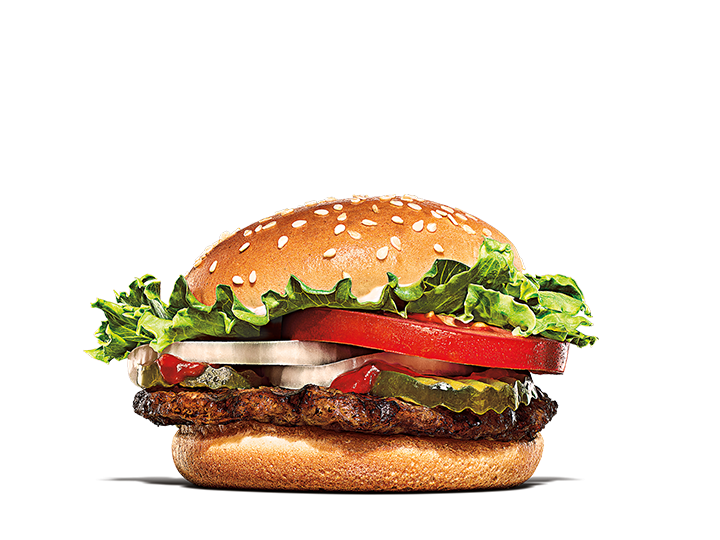

In [ ]:
result = agent_executor.run("와퍼주니어 설명해줘")


print(f"질문 : {result[0]['question']}")
print('----------------------------')
print(f"답변 : {result[0]['answer']}")
print('----------------------------')
print("이미지")
Image.open(requests.get(result[1], stream=True).raw)



> Entering new AgentExecutor chain...
({'question': '쉐이킹프라이 설명해줘', 'answer': '쉐이킹프라이는 버거킹의 프렌치 프라이 메뉴 중 하나로, 깊은 풍미가 느껴지는 시즈닝으로 취향을 저격하는 메뉴입니다. 고소한 치즈맛과 매콤함이 더해져 맛있게 즐길 수 있습니다. 가격은 3,300원입니다.', 'sources': ''}, 'https://d1cua0vf0mkpiy.cloudfront.net/images/menu/normal/464f2b35-bc1e-45bb-9b0c-5aa3209ac72c.png')


> Finished chain.
질문 : 쉐이킹프라이 설명해줘
----------------------------
답변 : 쉐이킹프라이는 버거킹의 프렌치 프라이 메뉴 중 하나로, 깊은 풍미가 느껴지는 시즈닝으로 취향을 저격하는 메뉴입니다. 고소한 치즈맛과 매콤함이 더해져 맛있게 즐길 수 있습니다. 가격은 3,300원입니다.
----------------------------
이미지


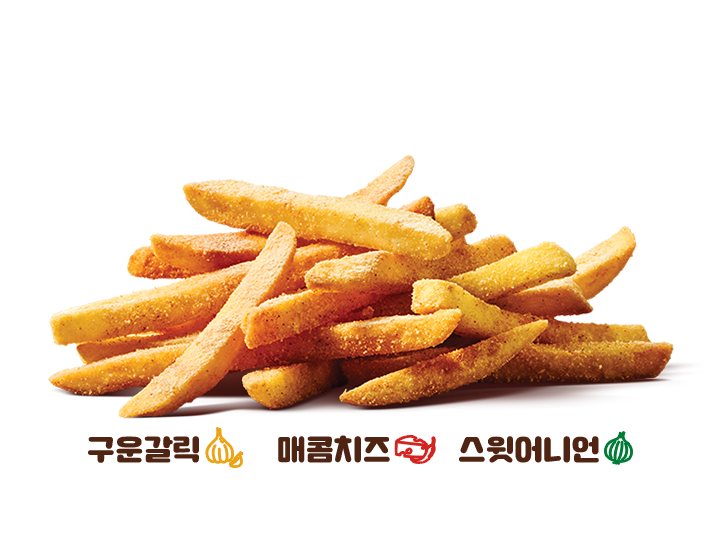

In [ ]:
result = agent_executor.run("쉐이킹프라이 설명해줘")


print(f"질문 : {result[0]['question']}")
print('----------------------------')
print(f"답변 : {result[0]['answer']}")
print('----------------------------')
print("이미지")
Image.open(requests.get(result[1], stream=True).raw)

### 정리

1. Prompt의 범위를 너무 넓게 잡지 않기
2. Prompt의 재현율이 낮으면 act, example로 원하는 형태의 결과를 재현할 수 있도록 Prompt 추가
3. 사용하는 chain에 대한 이해 (help() 나 langchain 공식문서)
4. 잘 만든 Prompt에 추가적인 기능을 넣고 싶다면 FakeAgent
5. Chroma는 생각보다 강력한 기능이 있습니다.
6. 잘 만들어진 다양한 Prompt 보기


https://github.com/f/awesome-chatgpt-prompts
